# Mann-Whitney U Test Criterion

Group: 8_12, median_m: 267.5, median_f: 239.5
Group: 17_21, median_m: 254.0, median_f: 160.0


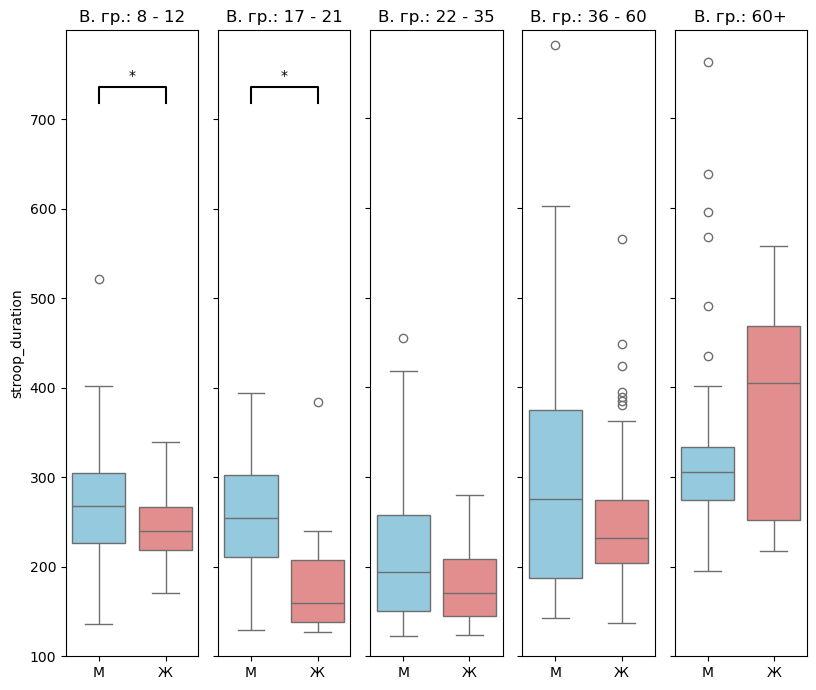

In [18]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import starbars
from scipy.stats import mannwhitneyu 

wr.filterwarnings('ignore')

# Loading and reading dataset
df = pd.read_excel("dataset_mental_report_new.xlsx")
df.drop(["Unnamed: 0"], axis=1, inplace=True)  # Deleted first column

# Calculating Mann-Whitney U for each age group, hue = gender
old_group_values = list(set(df['old_group'].tolist()))
alphas = []
groups_to_remove = []

for group in old_group_values:
    temp_df = df.loc[df['old_group'] == group]
    x = temp_df.query('gender == "М"')['stroop_duration']
    y = temp_df.query('gender == "Ж"')['stroop_duration']

    if x.empty or y.empty:
        groups_to_remove.append(group)
        continue

    stats, alpha = mannwhitneyu(x, y)
    alphas.append(alpha)

for group in groups_to_remove:
    old_group_values.remove(group)

group_alpha_df = pd.DataFrame({'group': old_group_values, 'alpha': alphas})

# Function to sort groups
def custom_sort(group):
    first_number = group.split('_')
    return int(first_number[0])

# Sorting groups
group_alpha_df.sort_values(by='group', key=lambda x: x.map(custom_sort), inplace=True)

# Найти минимальное и максимальное значение stroop_duration для всего DataFrame
y_min = df['stroop_duration'].min()
y_max = df['stroop_duration'].max()

# Plotting boxplots
plt.figure(figsize=(21/2.54, 7))  # Ширина 21 см, высота 9 см
for i, row in enumerate(group_alpha_df.itertuples()):
    group = row.group
    alpha = row.alpha
    temp_df = df.loc[df['old_group'] == group]
    plt.subplot(1, len(group_alpha_df), i + 1)  
    ax = sns.boxplot(data=temp_df, x='gender', y='stroop_duration', hue='gender', palette={"М": "skyblue", "Ж": "lightcoral"}, order = ['М', 'Ж'])
    if alpha >= 0.05:
        ax.set_ylim(100, 700 * 1.14)
    else:
        ax.set_ylim(100, 700)
    age_range = group.split('_')
    if age_range[1] == 'PLUS':
        plt.title(f'В. гр.: {age_range[0]}+')
    else:
        plt.title(f'В. гр.: {age_range[0]} - {age_range[1]}')
    plt.xlabel('')
    if i != 0:
        ax.set(yticklabels=[])
        ax.set(ylabel='')

    if i < 2:
        median_m = temp_df[temp_df['gender'] == 'М']['stroop_duration'].median()
        median_f = temp_df[temp_df['gender'] == 'Ж']['stroop_duration'].median()
        print(f'Group: {group}, median_m: {median_m}, median_f: {median_f}')

    # Drawing annotation
    if alpha < 0.05:
        starbars.draw_annotation([(0, 1, alpha)], ax=ax) 
plt.savefig("output.jpg", dpi = 300, bbox_inches='tight')
plt.tight_layout()
plt.show()



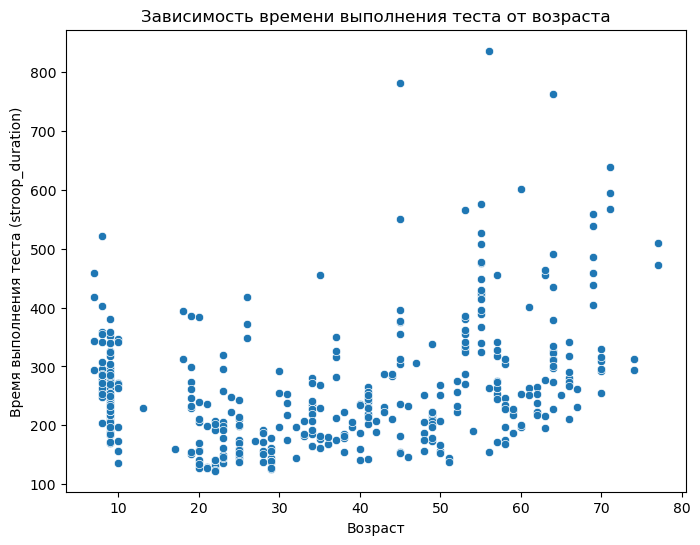

Коэффициент корреляции Пирсона: 0.310
P-значение: 0.000
Существует статистически значимая положительная корреляция между возрастом и временем выполнения теста.


In [19]:
# Визуализация данных
plt.figure(figsize=(8, 6))
sns.scatterplot(x='old', y='stroop_duration', data=df)
plt.title("Зависимость времени выполнения теста от возраста")
plt.xlabel("Возраст")
plt.ylabel("Время выполнения теста (stroop_duration)")
plt.show()

# Проверка корреляции Пирсона
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['old'], df['stroop_duration'])

# Вывод результатов
print(f"Коэффициент корреляции Пирсона: {correlation:.3f}")
print(f"P-значение: {p_value:.3f}")

# Интерпретация
if p_value < 0.05:
    if correlation > 0:
        print("Существует статистически значимая положительная корреляция между возрастом и временем выполнения теста.")
    else:
        print("Существует статистически значимая отрицательная корреляция между возрастом и временем выполнения теста.")
else:
    print("Корреляция между возрастом и временем выполнения теста не является статистически значимой.")